In [2]:
from sympy import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from ipywidgets import interact, widgets
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from decimal import *

## Se importan los archivos con los datos del redshift (z), la asención recta (ra) y la declinación (dec).

In [3]:
z=np.genfromtxt('z.csv',delimiter=',')
ra=np.genfromtxt('RA.csv',delimiter=',')
dec=np.genfromtxt('DEC.csv',delimiter=',')

## Se generan tres vectores que contengan los datos descargados anteriormente.

In [4]:
Z=[]
DEC=[]
RA=[]
for i in range(len(z)):
    Z.append(z[i,1])
    DEC.append(dec[i,1])
    RA.append(ra[i,1])

## Se crea una matriz de 500.000 x 3.

In [5]:
T=np.zeros((len(Z)-1, 3))

## Cada colomna de la matriz anterior se llena con los datos de z, ra y dec respectivamente.

In [6]:
for i in range(len(Z)-1):
    for j in range(3):
        T[i][0]=(Z[i+1])
        T[i][1]=(RA[i+1])
        T[i][2]=(DEC[i+1])

## Se ordenan los datos en la matriz de acuerdo al redshift (de menor a mayor)

In [7]:
T = sorted(T, key=lambda T_entry: T_entry[0]) 

## Se definen las constantes que se usarán: 
$ocm = \Omega_m$,

$oca = \Omega_{\Lambda}$, 

$H0$ $=$ $Hubble$ $constant$,

$C$ $=$ $speed$ $of$ $ligth$.

In [8]:
ocm=0.24
oca=0.76

h=0.8

H0=100.*h

C=3.*10**5

## Se define la función que se usará para hallar las distancias.
$f(z)=\frac{1}{H_0\sqrt{\Omega_m(1+z)^3+\Omega_{\Lambda}}}$

In [9]:
def f(a,b,c):
    return 1/(H0*(np.sqrt(a*(1+b)**3 + c)))

## Se encuentran las distancias a cada quasar y se guardan en el vector r. Acá se realiza una suma de Rieman con $n$ valores entre cero y cada $z_i$.

In [10]:
n=200
r=[]
for i in range(len(Z)-1):
    x=np.linspace(0,T[i][0],n)
    v=[]
    for j in range (len(x)):
        v.append(f(ocm,x[j],oca))
    a=0
    for k in range(len(x)-1):
        a=a+(x[k+1]-x[k])*v[k]
    r.append(a)

## Se encuentran las coordenadas cartesianas de acuerdo a:
$x=r\cos(\theta)\cos(\phi)$,

$y=r\cos(\theta)\sin(\phi)$,

$z=r\sin(\theta)$,
## donde $\theta$ es el ángulo de declinación, y $\phi$ la asención recta. Estos valores se guardan los valores en los vectores xx, yy y zz respectivamente.

In [11]:
xx=[]
yy=[]
zz=[]
for i in range(len(r)):
    xx.append(r[i]*np.cos(T[i][2]*np.pi/180)*np.cos(T[i][1]*np.pi/180))
    yy.append(r[i]*np.cos(T[i][2]*np.pi/180)*np.sin(T[i][1]*np.pi/180))
    zz.append(r[i]*np.sin(T[i][2]*np.pi/180))

## Se eligen los vértices de la caja que contiene la muestra de quasares.

In [36]:
px1=-0.007
px2=-0.012

py1=-0.01
py2=0.01

pz1=0
pz2=0.01

## Se grafica la muestra de quasares junto con los puntos elegidos anteriormente para verificar que quede dentro de la región donde están los quasares.

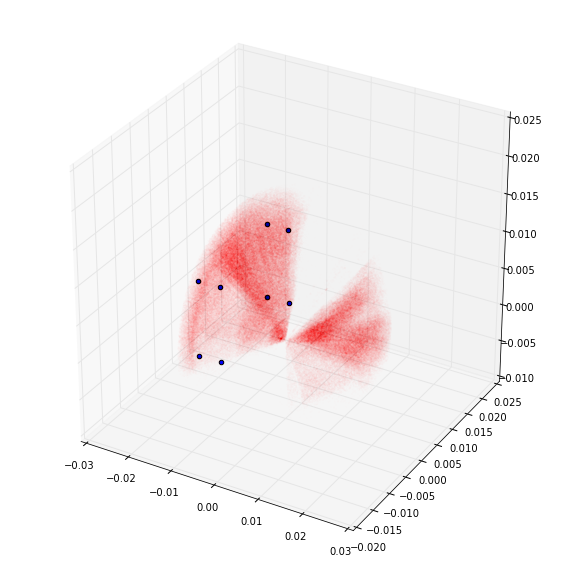

In [37]:
fig=plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(px1,py1,pz1)
ax.scatter3D(px1,py1,pz2)
ax.scatter3D(px1,py2,pz1)
ax.scatter3D(px1,py2,pz2)
ax.scatter3D(px2,py1,pz1)
ax.scatter3D(px2,py1,pz2)
ax.scatter3D(px2,py2,pz1)
ax.scatter3D(px2,py2,pz2)
ax.scatter3D(xx,yy,zz,s=0.00001, color='red')
#ax.view_init(30,265)

## Se grafican las posiciones de los quasares

In [ ]:
for angle in range(220,300,15):

    fig=plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(xx,yy,zz,s=0.00001, color='red')

    ax.view_init(30,angle)

    filename='ANIMATION\Anim'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()